In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer


In [3]:
file_path = 'C:\SpringBoard\Waste_Management_Project\Dataset\Dataset.xlsx' 
waste_data = pd.read_excel(file_path)


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\athar\AppData\Local\Temp\ipykernel_20224\2033229203.py:1: SyntaxWarning: invalid escape sequence '\S'
  file_path = 'C:\SpringBoard\Waste_Management_Project\Dataset\Dataset.xlsx'


In [4]:
waste_data

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,2023-09-01 12:00:00,non_recyclable,0.90,0.12,0.47,16.27
1,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.00
2,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
3,2,2023-09-01 12:45:00,organic,1.00,0.37,0.52,91.80
4,3,2023-09-01 13:00:00,recyclable,1.39,0.88,0.76,98.83
...,...,...,...,...,...,...,...
19995,4,2024-03-27 18:45:00,non_recyclable,1.30,0.41,0.46,58.57
19996,4,2024-03-27 19:00:00,non_recyclable,0.68,0.87,0.71,12.00
19997,3,2024-03-27 19:15:00,non_recyclable,1.12,0.79,0.07,29.03
19998,2,2024-03-27 19:30:00,organic,1.18,0.05,0.05,40.17


In [5]:
print("Initial Data Overview:")
print(waste_data.info())
print(waste_data.head())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   sensor_id            20000 non-null  int64         
 1   timestamp            20000 non-null  datetime64[ns]
 2   waste_type           20000 non-null  object        
 3   inductive_property   20000 non-null  float64       
 4   capacitive_property  20000 non-null  float64       
 5   moisture_property    20000 non-null  float64       
 6   infrared_property    20000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.1+ MB
None
   sensor_id           timestamp      waste_type  inductive_property  \
0          3 2023-09-01 12:00:00  non_recyclable                0.90   
1          4 2023-09-01 12:15:00      recyclable                1.18   
2          3 2023-09-01 12:30:00  non_recyclable      

In [6]:
# Handle missing values (replace with mean)
imputer = SimpleImputer(strategy='mean')
waste_data[['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']] = imputer.fit_transform(waste_data[['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']])


In [7]:
print("\nMissing Values Before Handling:")
print(waste_data.isnull().sum())


Missing Values Before Handling:
sensor_id              0
timestamp              0
waste_type             0
inductive_property     0
capacitive_property    0
moisture_property      0
infrared_property      0
dtype: int64


In [8]:
waste_data['timestamp'] = pd.to_datetime(waste_data['timestamp'])

In [9]:
label_encoder = LabelEncoder()
waste_data['waste_type'] = label_encoder.fit_transform(waste_data['waste_type'])

In [10]:
waste_data

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,2023-09-01 12:00:00,0,0.90,0.12,0.47,16.27
1,4,2023-09-01 12:15:00,2,1.18,0.66,0.33,36.00
2,3,2023-09-01 12:30:00,0,0.87,0.14,0.83,58.89
3,2,2023-09-01 12:45:00,1,1.00,0.37,0.52,91.80
4,3,2023-09-01 13:00:00,2,1.39,0.88,0.76,98.83
...,...,...,...,...,...,...,...
19995,4,2024-03-27 18:45:00,0,1.30,0.41,0.46,58.57
19996,4,2024-03-27 19:00:00,0,0.68,0.87,0.71,12.00
19997,3,2024-03-27 19:15:00,0,1.12,0.79,0.07,29.03
19998,2,2024-03-27 19:30:00,1,1.18,0.05,0.05,40.17


In [11]:
numeric_columns = ['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']

In [12]:
z_scores = waste_data[numeric_columns].apply(zscore)

In [13]:
outlier_threshold = 3
outliers = (z_scores.abs() > outlier_threshold).any(axis=1)

In [14]:
print(f"\nNumber of Outliers Detected: {outliers.sum()}")


Number of Outliers Detected: 0


In [15]:
cleaned_data = waste_data[~outliers]

In [18]:
import pandas as pd
reduced_data, _ = train_test_split(cleaned_data, test_size=0.5, stratify=cleaned_data['waste_type'], random_state=42)

print("Original dataset size:", cleaned_data.shape)
print("Reduced dataset size:", reduced_data.shape)

# Save reduced data for further processing or training
reduced_data.to_csv("reduced_dataset.csv", index=False)


cleaned_data = pd.read_csv("reduced_dataset.csv")

Original dataset size: (20000, 7)
Reduced dataset size: (10000, 7)


In [19]:
cleaned_data.columns = [col.lower().replace(" ", "_") for col in cleaned_data.columns]

In [20]:
cleaned_data.to_csv('cleaned_waste_data.csv', index=False)
print("\nData Preprocessing Complete!")


Data Preprocessing Complete!


In [21]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

Text(0, 0.5, 'Count')

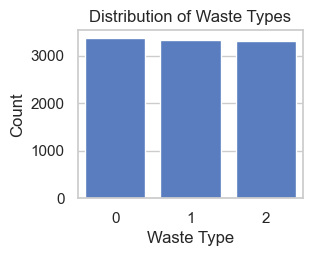

In [22]:
# 1. Distribution of waste types
plt.subplot(2, 2, 1)
sns.countplot(data=cleaned_data, x='waste_type')
plt.title('Distribution of Waste Types')
plt.xlabel('Waste Type')
plt.ylabel('Count')

C:\Users\athar\AppData\Local\Temp\ipykernel_20224\2458882548.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cleaned_data, x='timestamp', y='moisture_property', ci=None)


Text(0, 0.5, 'Moisture Property')

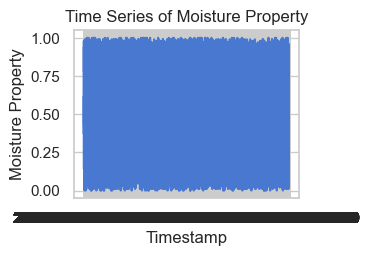

In [23]:
# 2. Time-series trend of a property
plt.subplot(2, 2, 2)
sns.lineplot(data=cleaned_data, x='timestamp', y='moisture_property', ci=None)
plt.title('Time Series of Moisture Property')
plt.xlabel('Timestamp')
plt.ylabel('Moisture Property')

Text(0.5, 1.0, 'Correlation Heatmap')

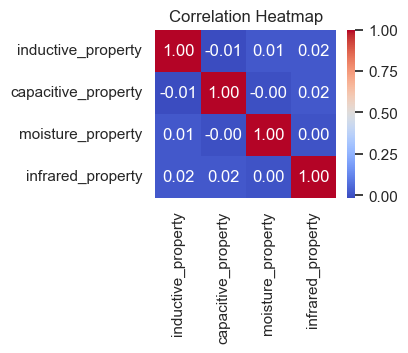

In [24]:
# 3. Correlation heatmap
plt.subplot(2, 2, 3)
corr = cleaned_data[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')

Text(0, 0.5, 'Inductive Property')

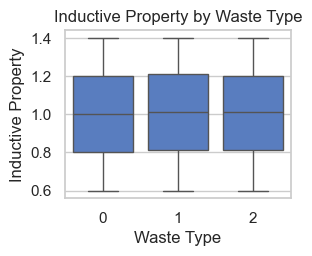

In [25]:
# 4. Boxplot for waste properties by type
plt.subplot(2, 2, 4)
sns.boxplot(data=cleaned_data, x='waste_type', y='inductive_property')
plt.title('Inductive Property by Waste Type')
plt.xlabel('Waste Type')
plt.ylabel('Inductive Property')


In [26]:
# Show all plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [27]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

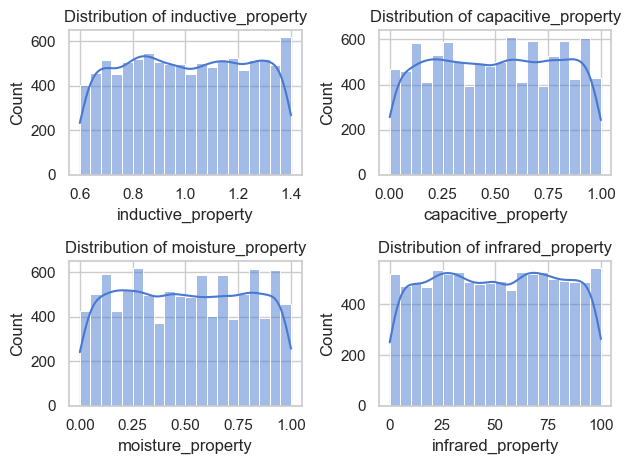

In [28]:
# 1. Distribution Plots for Numerical Features
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=cleaned_data, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

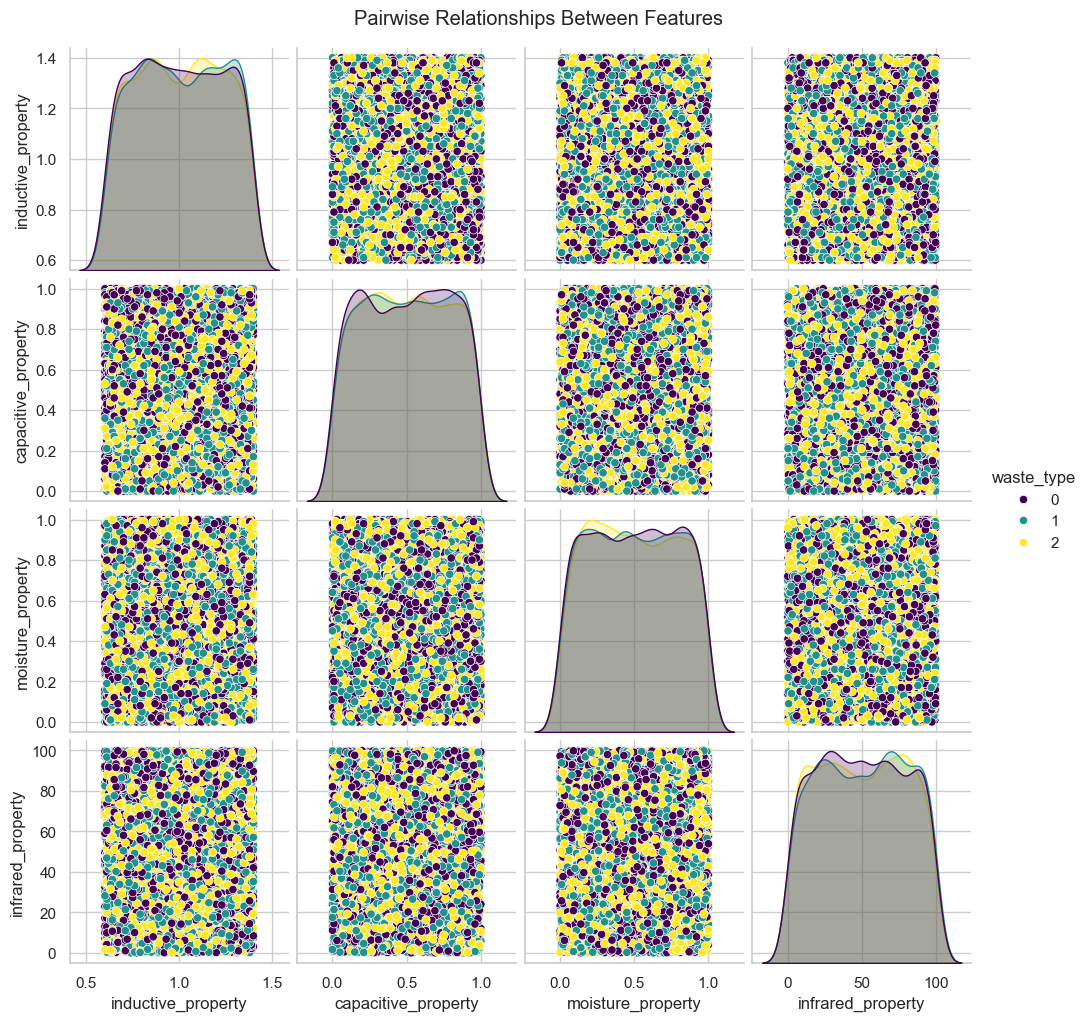

In [29]:
# 2. Pairplot for Relationships Between Features
sns.pairplot(cleaned_data, vars=numeric_columns, hue='waste_type', palette='viridis')
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()


C:\Users\athar\AppData\Local\Temp\ipykernel_20224\165140683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cleaned_data, x='waste_type', y=column, palette='Set2')
C:\Users\athar\AppData\Local\Temp\ipykernel_20224\165140683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cleaned_data, x='waste_type', y=column, palette='Set2')
C:\Users\athar\AppData\Local\Temp\ipykernel_20224\165140683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cleaned_data, x='waste_type', y=column, palette='Set2')
C:\Users\athar\AppD

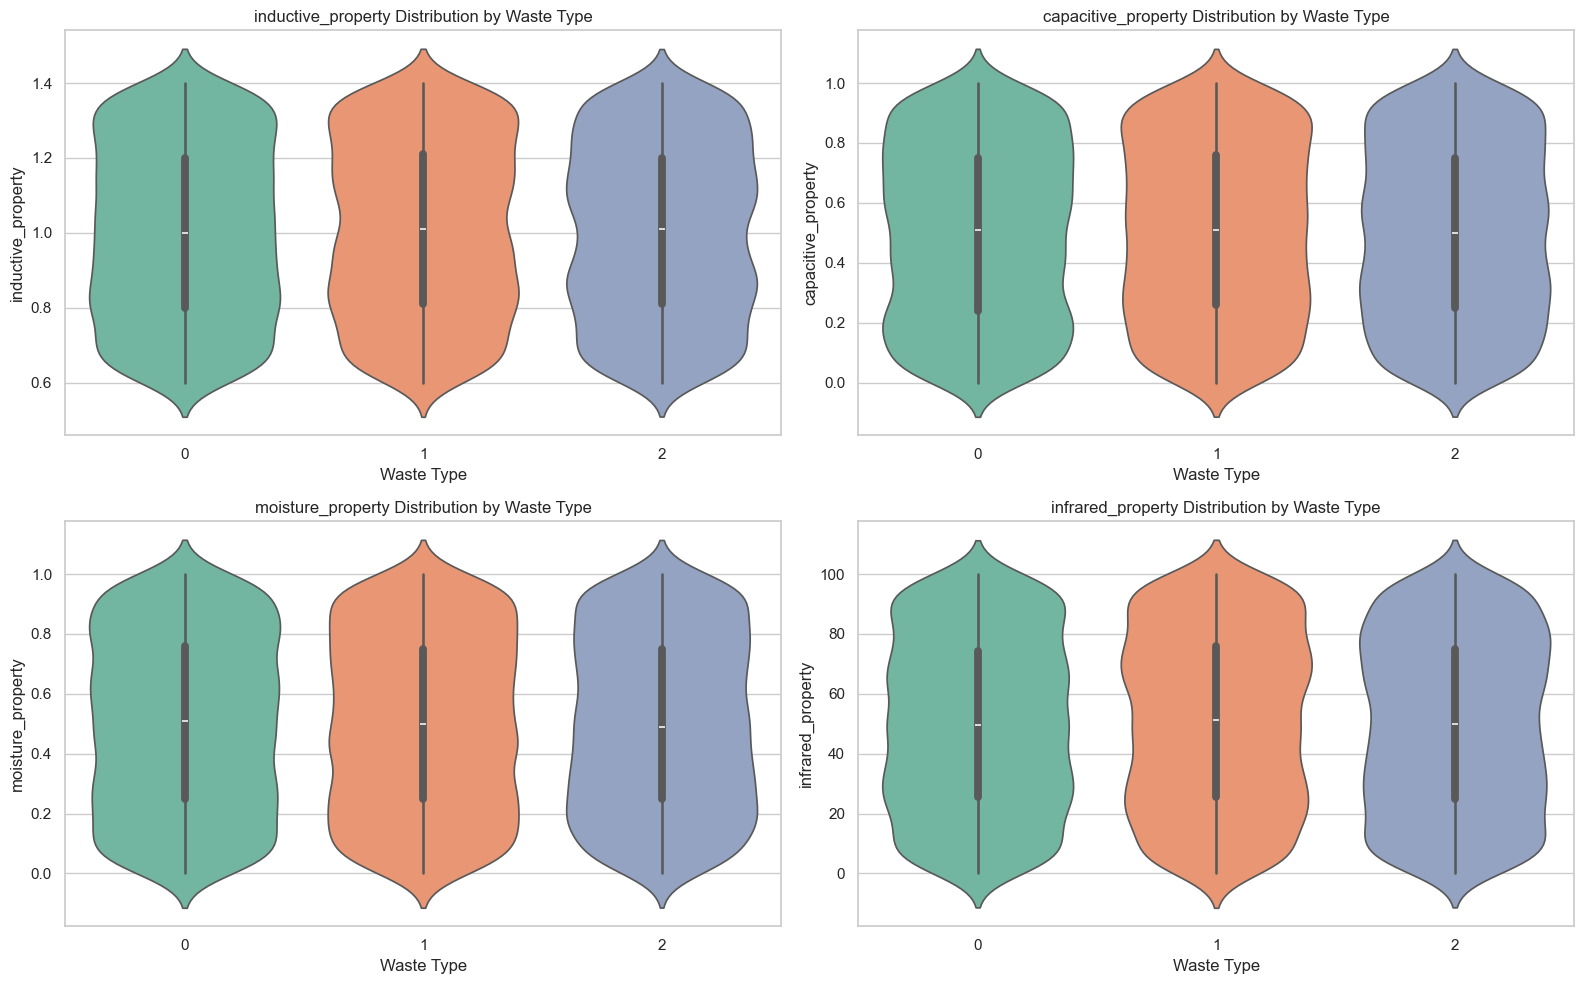

In [30]:
# 3. Violin Plots for Sensor Properties by Waste Type
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=cleaned_data, x='waste_type', y=column, palette='Set2')
    plt.title(f'{column} Distribution by Waste Type')
    plt.xlabel('Waste Type')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

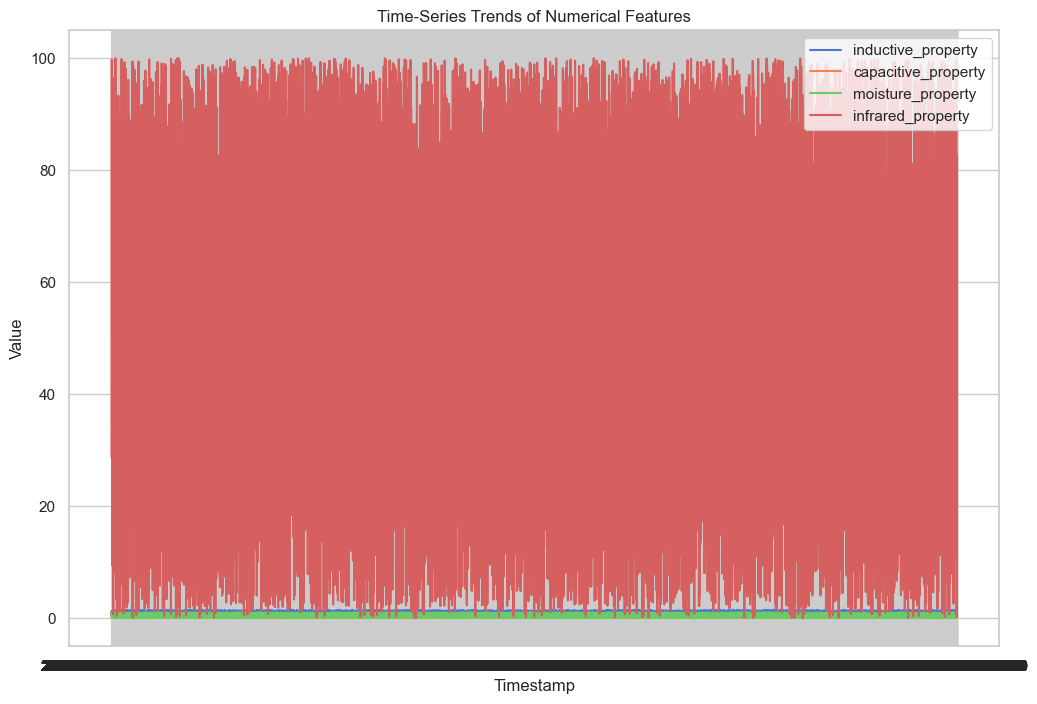

In [31]:
# 4. Time-Series Trends for Multiple Features
plt.figure(figsize=(12, 8))
for column in numeric_columns:
    sns.lineplot(data=cleaned_data, x='timestamp', y=column, label=column)
plt.title('Time-Series Trends of Numerical Features')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

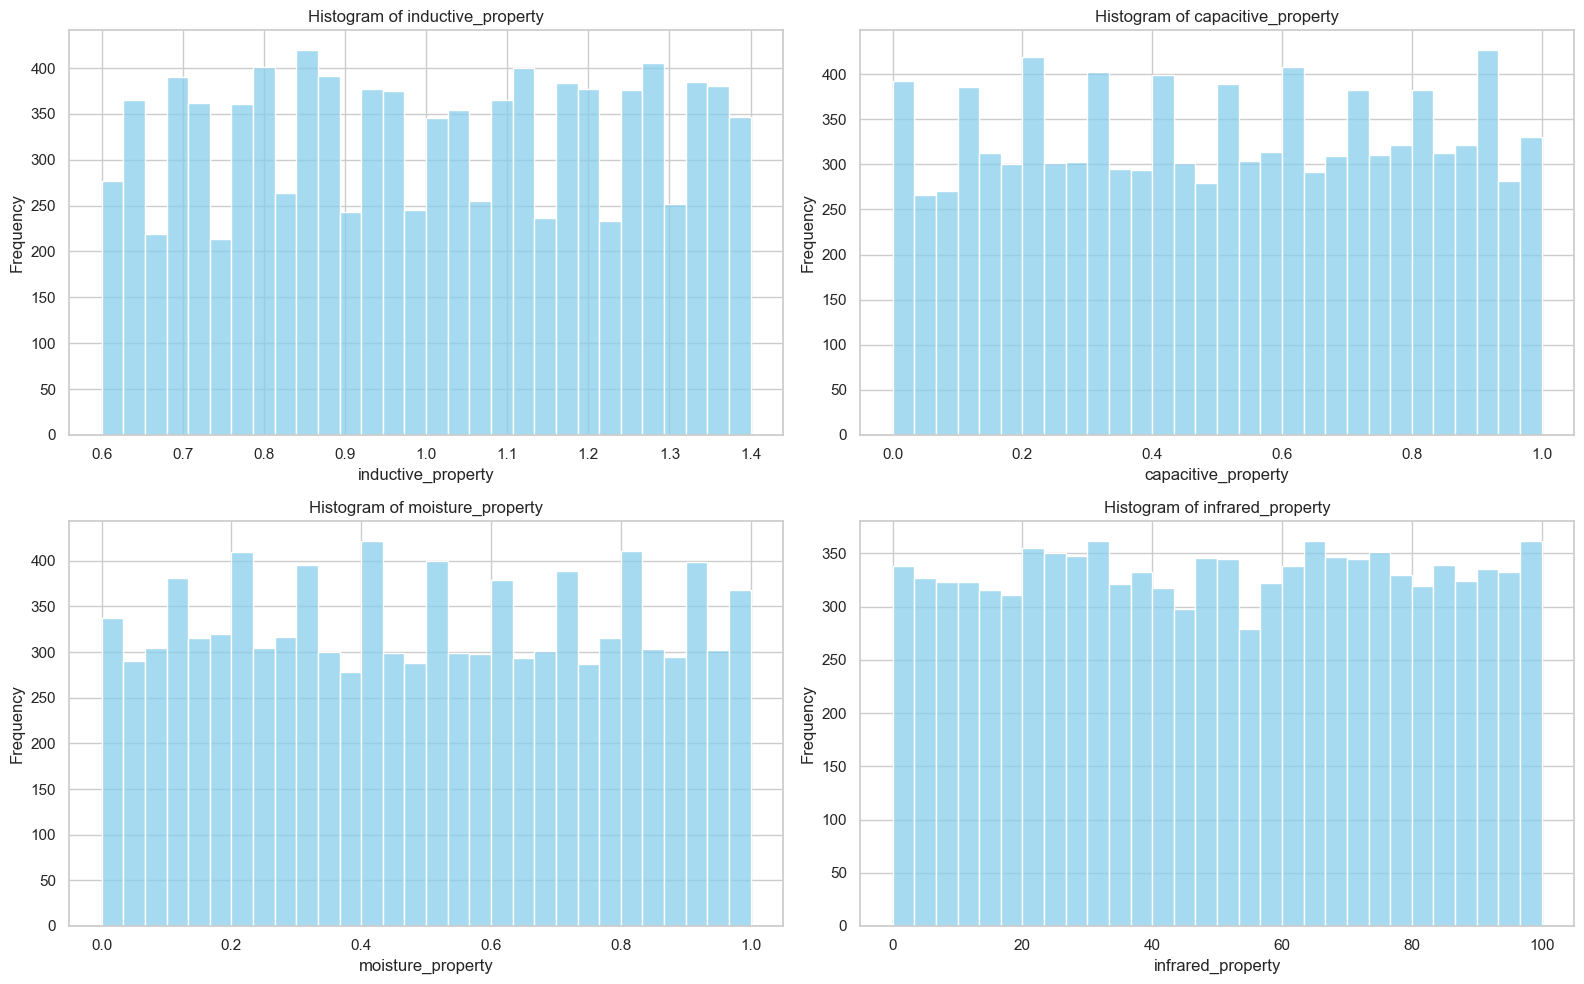

In [32]:
# 5. Histogram for Each Waste Property
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=cleaned_data, x=column, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

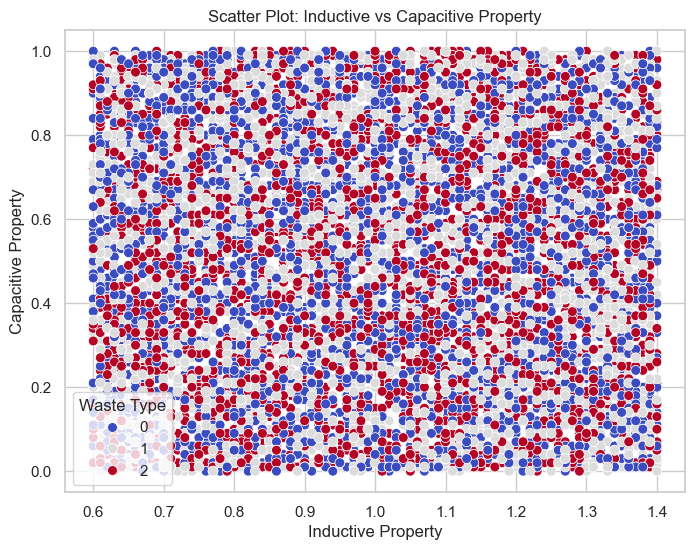

In [33]:
# 7. Scatter Plot Between Two Features (e.g., Inductive vs Capacitive Property)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_data, x='inductive_property', y='capacitive_property', hue='waste_type', palette='coolwarm', s=50)
plt.title('Scatter Plot: Inductive vs Capacitive Property')
plt.xlabel('Inductive Property')
plt.ylabel('Capacitive Property')
plt.legend(title='Waste Type')
plt.show()


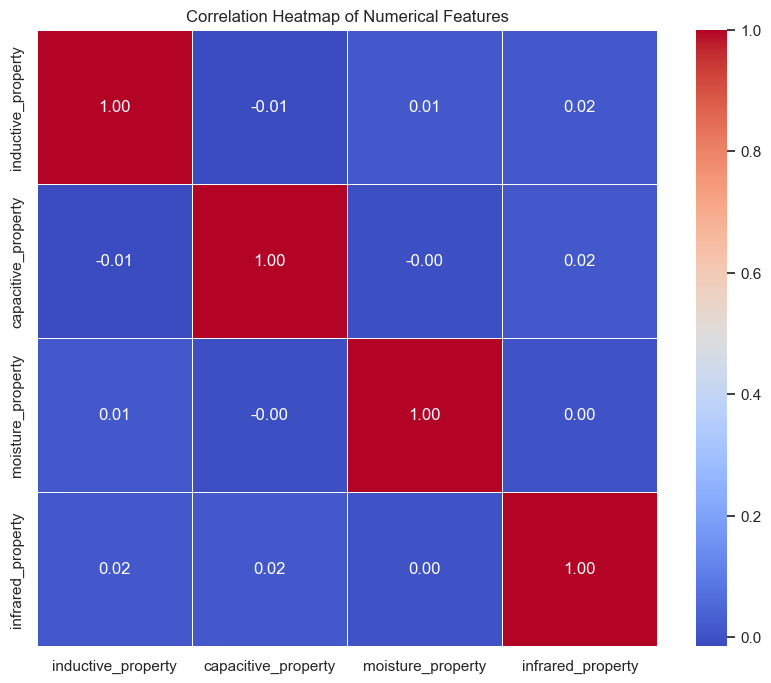

In [34]:
# 8. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [35]:
"""Purpose of Each Plot
Distribution Plots: Highlight the spread and density of numerical features.
Pairplots: Show pairwise relationships and clusters between waste types.
Violin Plots: Combine boxplot and kernel density estimate for richer insights.
Time-Series Trends: Highlight seasonal or periodic changes in waste properties.
Histograms: Show how frequently sensor readings fall within specific ranges.
Missing Values Heatmap: Detect patterns in missing data (if applicable).
Scatter Plot: Examine the relationship between two key features.
Correlation Heatmap: Identify strong relationships or redundancies between features. """

'Purpose of Each Plot\nDistribution Plots: Highlight the spread and density of numerical features.\nPairplots: Show pairwise relationships and clusters between waste types.\nViolin Plots: Combine boxplot and kernel density estimate for richer insights.\nTime-Series Trends: Highlight seasonal or periodic changes in waste properties.\nHistograms: Show how frequently sensor readings fall within specific ranges.\nMissing Values Heatmap: Detect patterns in missing data (if applicable).\nScatter Plot: Examine the relationship between two key features.\nCorrelation Heatmap: Identify strong relationships or redundancies between features. '

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
X = cleaned_data[['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']]
y = cleaned_data['waste_type']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [41]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.33      0.33       672
           1       0.32      0.33      0.32       650
           2       0.33      0.31      0.32       678

    accuracy                           0.32      2000
   macro avg       0.32      0.32      0.32      2000
weighted avg       0.32      0.32      0.32      2000


Confusion Matrix:
[[224 215 233]
 [233 212 205]
 [237 230 211]]

Accuracy Score: 0.3235


In [42]:
# Feature Importance
feature_importances = rf_model.feature_importances_
features = X.columns

C:\Users\athar\AppData\Local\Temp\ipykernel_20224\2355849872.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


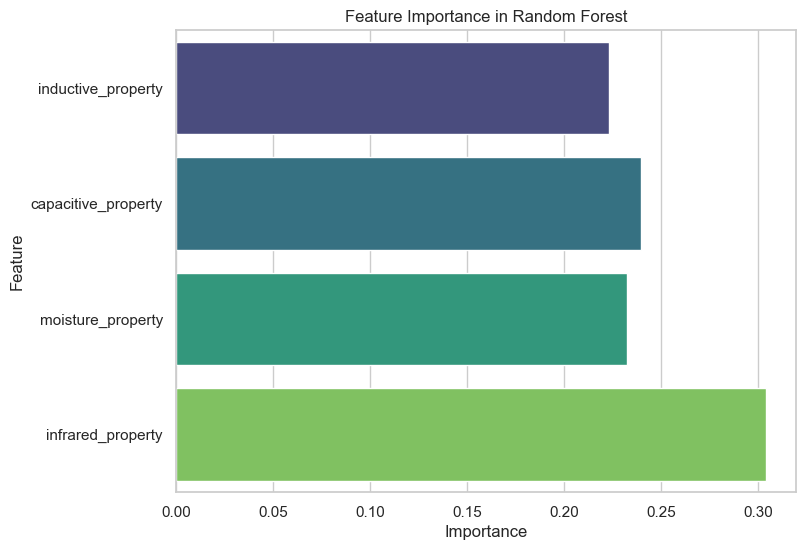

In [43]:
# Visualize Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()